In [1]:
import pandas as pd
import numpy as np
import requests
from tqdm import tqdm
import io
from PIL import Image

In [2]:
df = pd.read_csv('tabelacompleta.csv')
df_ap = pd.read_csv('dados\AerodromosPublicos.csv', sep=';')
df_ap = df_ap[['Código OACI', 'LATGEOPOINT','LONGEOPOINT']]
df = df.merge(df_ap, left_on='origem', right_on='Código OACI',how='left')

In [3]:
df_train = df[~df.espera.isnull()]
df_test = df[df.espera.isnull()]

In [4]:
def load_crop_img(path):
    image = Image.open(path)
    w = image.width
    h = image.height
    img_brasil = image.crop((1030, 820, w-250, h-620))
    return img_brasil

In [87]:
def paint_airport(image, lat_airport, lon_airport):

    # Mapas de latitude e longitude do Brasil
    lat_map = np.linspace(-33.750812, 5.235216, 888)
    lon_map = np.linspace(-73.981645, -34.792202, 912)

    # Posicao do aeroporto na imagem
    lat_result = np.abs(lat_map - lat_airport).argmin()
    lon_result = np.abs(lon_map - lon_airport).argmin()

    # Ajuste da latitude
    lat_result = 888 - lat_result

    # Pinta a imagem
    image = image[lat_result - 250 : lat_result + 250, lon_result - 250 : lon_result + 250 , :] # Roxo

    return image

In [5]:
# Recorta os arredores do aeroporto
def crop_airport(image, lat_airport, lon_airport):
    h = image.height
    w = image.width

    image = image.crop([68, 106, w-16, h-115]) # Recorte da imagem para condizer com as coordenadas de latitude e longitude
    h = image.height
    w = image.width

    lat_range = np.linspace(-55, 35, h)
    lon_range = np.linspace(-25, -115, w)
    lat_result = h - np.abs(lat_range - lat_airport).argmin()
    lon_result = w - np.abs(lon_range - lon_airport).argmin()

    image = image.crop([lon_result - 200, lat_result - 200, lon_result + 200, lat_result + 200])
    return image

In [11]:
for id, url, espera, lat, lon in tqdm(zip(df.loc[df['espera'] == 1].flightid ,df.loc[df['espera'] == 1].url_img_satelite, df.loc[df['espera'] == 1].espera, df.loc[df['espera'] == 1].LATGEOPOINT, df.loc[df['espera'] == 1].LONGEOPOINT)):
    try:
        image_name = url.split('/')[-1]
        img = Image.open('imgs/' + image_name)
        img_crop = crop_airport(img, float(lat), float(lon))
        image_final = img_crop.resize((224,224))
    except:
        continue
    if espera:
        label = 'atrasado'
    else:
        label = 'pontual'
    image_final.save(f'dados/imgs/ImagensHibrido/{id}.jpg')

0it [00:00, ?it/s]

3677it [01:32, 39.88it/s]


In [171]:
for id, url, lat, lon in tqdm(zip(df_test.flightid ,df_test.url_img_satelite, df_test.LATGEOPOINT, df_test.LONGEOPOINT)):
    try:
        image_name = url.split('/')[-1]
        img = Image.open('imgs/' + image_name)
        img_crop = crop_airport(img, float(lat), float(lon))
        image_final = img_crop.resize((224,224))

    except:
        continue
    image_final.save(f'dados/test/{id}.jpg')

90736it [40:06, 37.70it/s]


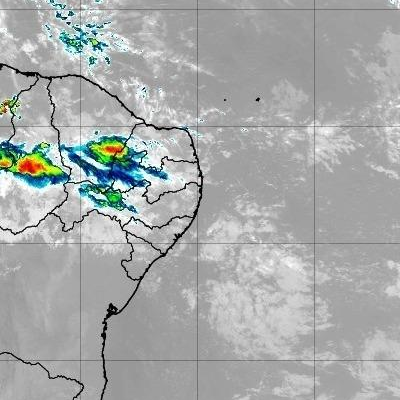

In [166]:
crop_airport(Image.open('imgs/' + image_name), float(lat), float(lon))